# NBA Salary Prediction Based on Age (Pandas version)

This notebook demonstrates how to build a simple machine learning model to predict the salary of an NBA player based on their age.

## Step 1: Import Libraries and Load the Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('nba.csv')

# Preview the data
print(data.head())

            Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


## Step 2: Data Exploration and Visualization

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64
           Number         Age      Weight        Salary
count  457.000000  457.000000  457.000000  4.460000e+02
mean    17.678337   26.938731  221.522976  4.842684e+06
std     15.966090    4.404016   26.368343  5.229238e+06
min      0.000000   19.000000  161.000000  3.088800e+04
25%      5.000000   24.000000  200.000000  1.044792e+06
50%     13.000000   26.000000  220.000000  2.839073e+06
75%     25.000000   30.000000  240.000000  6.500000e+06
max     99.000000   40.000000  307.000000  2.500000e+07


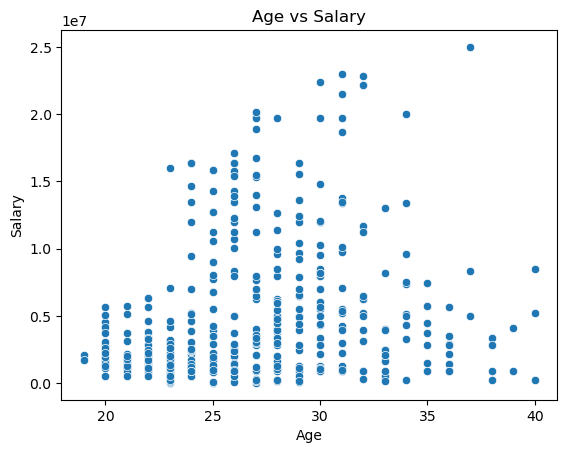

In [21]:
# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())

# Visualize the relationship between age and salary
sns.scatterplot(x='Age', y='Salary', data=data)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

In [22]:
data = data.dropna()
# Check for missing values
print(data.isnull().sum())

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


## Step 3: Prepare the Data

In [23]:
# Select the feature(s) and target variable
X = data[['Age']]  # Independent variable
y = data['Salary']         # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 291
Test set size: 73


## Step 4: Train the Model

In [24]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Output the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 552555.4105476332
Coefficient: 150972.20625394827


## Step 5: Evaluate the Model

Mean Squared Error: 26419308706877.684
R^2 Score: 0.0524027130785204


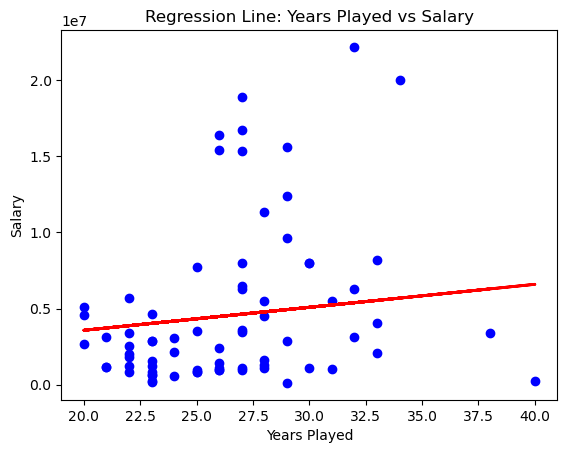

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Regression Line: Age vs Salary')
plt.show()


## Step 6: Make Predictions

In [26]:
# Predict the salary for a player with a certain age
age = np.array([[25]])  # Example: predicting salary for a player aged 25
predicted_salary = model.predict(age)
print(f'Predicted Salary for age {age[0][0]} : ${predicted_salary[0]:.2f}')

Predicted Salary for 5 years played: $1307416.44


/Users/smitrovich/opt/anaconda3/envs/snowpark/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Step 7. Fit a Neural Network Model

In [27]:
# Scale the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the MLPRegressor model
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='lbfgs', max_iter=500, random_state=12)

# Train the model
mlp.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=12,
             solver='lbfgs')

## Step 8. Evaluate a NNM

Mean Squared Error: 24338747937903.242
R^2 Score: 0.12702744159922552


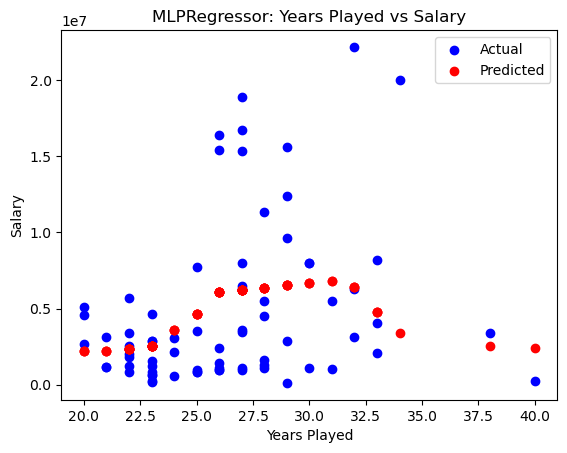

In [28]:
# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Age Played')
plt.ylabel('Salary')
plt.title('MLPRegressor: Age vs Salary')
plt.legend()
plt.show()


## Step 9. make predictions

In [29]:
# Predict the salary for a player with a certain age
age = np.array([[25]])  # Example: predicting salary for a player aged 25
age_scaled = scaler.transform(age)
predicted_salary = mlp.predict(age_scaled)
print(f'Predicted Salary for played aged {age[0][0]}: ${predicted_salary[0]:.2f}')


Predicted Salary for 5 years played: $3566203.00


/Users/smitrovich/opt/anaconda3/envs/snowpark/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Summary
This notebook provides a simple implementation of a linear regression model to predict NBA salaries based on the player's age. Depending on the available data, the model could be enhanced by incorporating additional features or by using more complex algorithms.
